<a href="https://colab.research.google.com/github/aSafarpoor/Traffic-Sign-Detection-DIPFinalProject-/blob/main/dip_project_phase0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import os
from tqdm import tqdm
import subprocess

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd drive/MyDrive/"DIP project"

/content/drive/MyDrive/DIP project


In [4]:
%cd data-v0

/content/drive/MyDrive/DIP project/data-v0


In [5]:
namelist = []
labellist = []

for i in tqdm(range(20)):
    os.chdir(str(i))
    output = subprocess.check_output(["ls"]).decode()
    templist = output.split('\n')
    for j in templist:
        namelist.append(str(i)+'/'+str(j))
        labellist.append(i)
    %cd ..

  5%|▌         | 1/20 [00:00<00:04,  3.93it/s]

/content/drive/MyDrive/DIP project/data-v0


 15%|█▌        | 3/20 [00:00<00:03,  4.67it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


 20%|██        | 4/20 [00:00<00:03,  4.70it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


 30%|███       | 6/20 [00:01<00:02,  5.79it/s]

/content/drive/MyDrive/DIP project/data-v0


 40%|████      | 8/20 [00:01<00:02,  5.33it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


100%|██████████| 20/20 [00:01<00:00, 10.51it/s]

/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0
/content/drive/MyDrive/DIP project/data-v0


In [6]:
ims = []
labels = []
c = -1
for name in tqdm(namelist):
    c+=1
    im = cv2.imread(name)
    try:
        len(im)<1
        ims.append(im)
        labels.append(labellist[c])
    except:
        pass
    

100%|██████████| 251/251 [00:47<00:00,  5.33it/s]


In [7]:
ims = np.array(ims)
len(ims),len(labels),ims.shape

(231, 231, (231, 32, 32, 3))

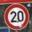

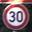

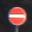

In [8]:
cv2_imshow(ims[0])
print('')
cv2_imshow(ims[10])
print('')
cv2_imshow(ims[100])


* SIGNAL BASED
* COLOR BASED
* EDGE BASED

# SIGNAL BASED

In [9]:
from scipy.fft import fft, fftfreq, fft2, ifft2

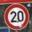

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


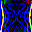

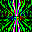

In [24]:
im = np.copy(ims[0])
fft_img = np.fft.fft2(im)
fft_img_shift = np.fft.fftshift(fft_img)
cv2_imshow(im)
cv2_imshow(fft_img)
cv2_imshow(fft_img_shift)

In [25]:
sample = np.copy(fft_img_shift)

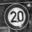

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


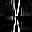

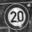

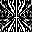

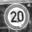

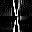

(32, 32)

In [28]:
s0 = sample[:,:,0]
s1 = sample[:,:,1]
s2 = sample[:,:,2]

cv2_imshow(im[:,:,0])
cv2_imshow(s0)
cv2_imshow(im[:,:,1])
cv2_imshow(s1)
cv2_imshow(im[:,:,2])
cv2_imshow(s2)

In [34]:
def distance(a,b):
    return round(((a[0]-b[0])**2+(a[1]-b[1])**2)**0.5,2)

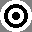

In [44]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    d1,d2 = s0.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = np.zeros((d1,d2))
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[i][j] = 0
            elif d<ths[1]:
                lavels_point[i][j] = 255
            elif d<ths[2]:
                lavels_point[i][j] = 0
            elif d<ths[3]:
                lavels_point[i][j] = 255
            else:
                lavels_point[i][j] = 128
    
    cv2_imshow(lavels_point)

func(sample)

In [56]:
def func(sample):
    sample = np.copy(sample)
    s0 = sample[:,:,0]
    s1 = sample[:,:,1]
    s2 = sample[:,:,2]
    d1,d2 = s0.shape
    m1,m2 = (d1-1)/2,(d2-1)/2
    # print(distance([0,0],[m1,m2]))
    ths = [4,8,12,16]
    lavels_point = [[],[],[],[],[]]
    for i in range(d1):
        for j in range(d2):
            d = distance([i,j],[m1,m1])
            if d<ths[0]:
                lavels_point[0].append(sample[i][j])
            elif d<ths[1]:
                lavels_point[1].append(sample[i][j])
            elif d<ths[2]:
                lavels_point[2].append(sample[i][j])
            elif d<ths[3]:
                lavels_point[3].append(sample[i][j])
            else:
                lavels_point[4].append(sample[i][j])
    lavels_point = np.array(lavels_point)
    return lavels_point

lavels_point = func(sample)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [57]:
out = [np.mean(lavels_point[0]),np.mean(lavels_point[1]),np.mean(lavels_point[2]),np.mean(lavels_point[3]),np.mean(lavels_point[4])]
absout = list(map(abs,out))
for i in range(len(out)):
    print(out[i],'\n   ---------------------------------------> ',absout[i])

(344.61848765284475+4.239451348040447j) 
   --------------------------------------->  344.64456325302206
(113.4202883212645+3.709230452653672j) 
   --------------------------------------->  113.4809243592493
(70.33016438785126-0.7327957353524178j) 
   --------------------------------------->  70.33398191778943
(51.49673775197299+0.15189204307414905j) 
   --------------------------------------->  51.496961757837994
(3.5953852317563273-3.2005148486155037j) 
   --------------------------------------->  4.813531994382069


In [62]:
np.array(lavels_point[0]).shape

(52, 3)